# Decision Tree Assignment 2

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.shape

(600, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<Axes: xlabel='Undergrad', ylabel='count'>

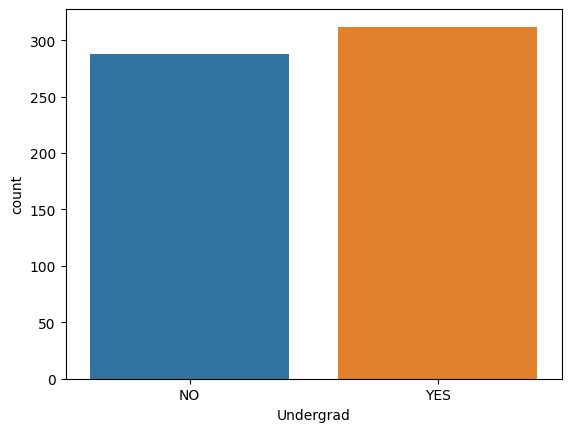

In [8]:
# Count of Undergred

plt.xlabel("Undergred")
plt.ylabel("Count")
sns.countplot(data=df,x = df['Undergrad'])

<Axes: xlabel='Urban', ylabel='count'>

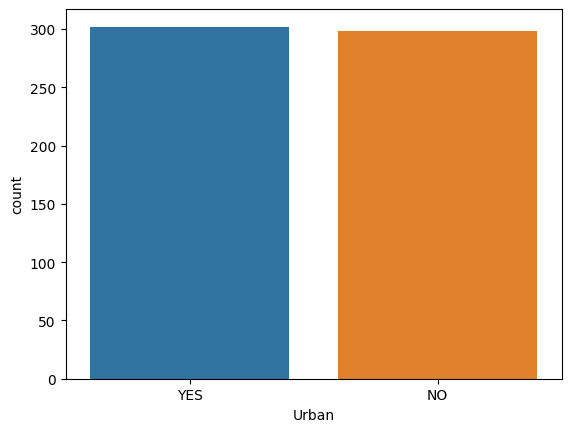

In [10]:
# Count of Urban

plt.xlabel("Urban")
plt.ylabel("Count")
sns.countplot(data=df,x = df['Urban'])

<Axes: xlabel='Marital.Status', ylabel='count'>

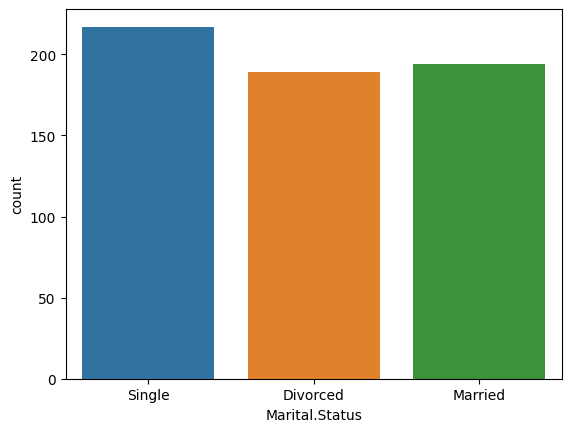

In [12]:
# Count of Marital_Status

plt.xlabel("Marital Status")
plt.ylabel("Count")
sns.countplot(data=df,x = df['Marital.Status'])

In [13]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


<Axes: xlabel='City>Population', ylabel='Taxable.Income'>

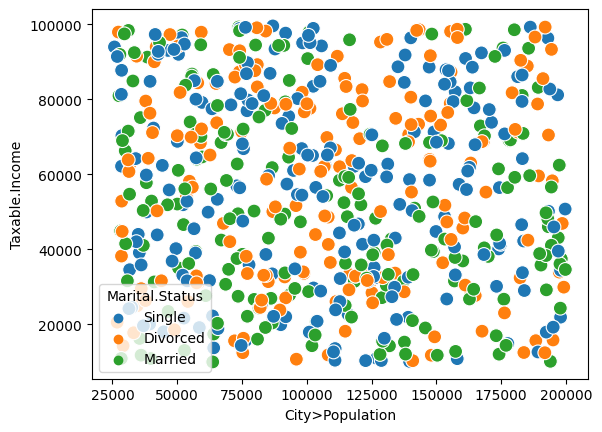

In [16]:
# Relation between Taxable.Income and City.population

plt.xlabel("City>Population")
plt.ylabel("Taxable.Income")
sns.scatterplot(data=df,x = df['City.Population'], y = df['Taxable.Income'],hue=df['Marital.Status'],s  = 100)

<Axes: >

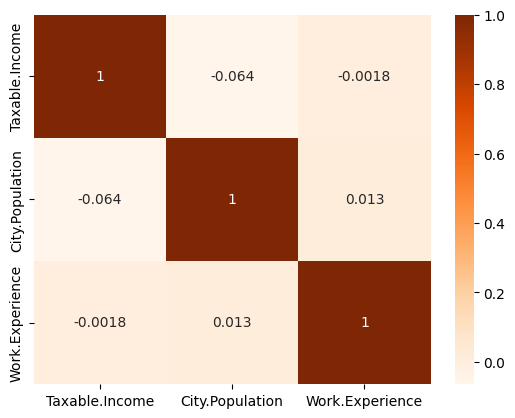

In [18]:
# Checking the correlation between Numerical columns
sns.heatmap(df.iloc[:,2:5].corr(),annot=True,cmap="Oranges")

In [19]:
# Converting the Taxable.Income into Categoical 

for i in range(0,len(df['Taxable.Income']),1):
    if df['Taxable.Income'].iloc[i] <= 30000:
        df['Taxable.Income'].iloc[i] = "Risky"
    else:
        df['Taxable.Income'].iloc[i] = "Good"

In [22]:
# Encoding the Categorical Value into Numerical Values
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Undergrad'] = encode.fit_transform(df['Undergrad'])
df['Marital.Status'] = encode.fit_transform(df['Marital.Status'])
df['Taxable.Income'] = encode.fit_transform(df['Taxable.Income'])
df['Urban'] = encode.fit_transform(df['Urban'])


In [23]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [27]:
# Spliting the data into independent and ependent variable

X = df.iloc[:,[0,1,3,4,5]]
X
Y = df.iloc[:,2]
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [29]:
# Scaling the Data into equal scale

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X.head()


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,-1.040833,1.160800,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,1.033109,1.634639,0.993355
3,0.960769,1.160800,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,-1.630532,1.408261,-1.006689


In [34]:
# Dividing the data into train_test
from sklearn.model_selection import train_test_split,KFold,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)
X_train.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
330,-1.040833,-0.056822,-1.316469,1.521450,-1.006689
544,-1.040833,1.160800,0.504525,0.615937,0.993355
194,0.960769,1.160800,-0.095694,1.408261,-1.006689
499,0.960769,1.160800,-1.204681,-1.534655,0.993355
502,-1.040833,-0.056822,-1.114415,-1.647844,0.993355


In [36]:
# training the Model

from sklearn.tree import DecisionTreeClassifier

tree_fraud = DecisionTreeClassifier(criterion='gini',random_state=0) 
tree_fraud.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

0.6166666666666667


<Axes: >

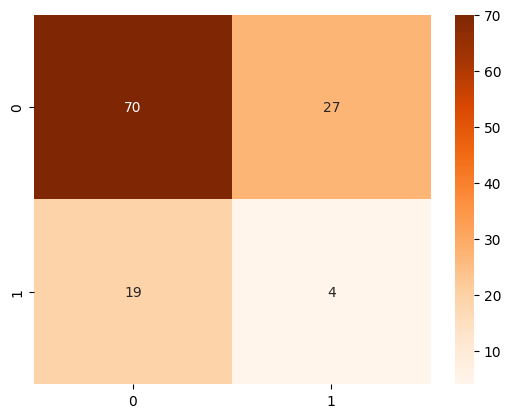

In [40]:
# Testing the Accuracy of the Model

from sklearn.metrics import accuracy_score,confusion_matrix

print(accuracy_score(y_test,tree_fraud.predict(X_test)))
sns.heatmap(confusion_matrix(y_test,tree_fraud.predict(X_test)),annot=True,cmap='Oranges')

In [41]:
#Checking the accuracy using Cross_val_score and Kfold

k = KFold(5)
model = DecisionTreeClassifier(criterion='gini',random_state=0)
result = cross_val_score(model,X,Y,cv=k)
print(np.mean(result))

0.6416666666666666


[Text(0.38427337398373984, 0.9772727272727273, 'x[3] <= -1.025\ngini = 0.332\nsamples = 480\nvalue = [379, 101]'),
 Text(0.09552845528455285, 0.9318181818181818, 'x[2] <= 1.714\ngini = 0.234\nsamples = 96\nvalue = [83, 13]'),
 Text(0.08739837398373984, 0.8863636363636364, 'x[3] <= -1.704\ngini = 0.221\nsamples = 95\nvalue = [83, 12]'),
 Text(0.07926829268292683, 0.8409090909090909, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.09552845528455285, 0.8409090909090909, 'x[3] <= -1.591\ngini = 0.247\nsamples = 83\nvalue = [71, 12]'),
 Text(0.04878048780487805, 0.7954545454545454, 'x[2] <= 1.298\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.04065040650406504, 0.75, 'x[1] <= -0.666\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.024390243902439025, 0.7045454545454546, 'x[4] <= -0.007\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.016260162601626018, 0.6590909090909091, 'x[2] <= -1.006\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.008130081300813009, 0.6

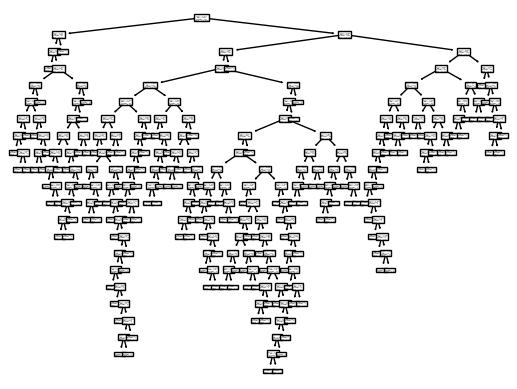

In [42]:
from sklearn import tree

tree.plot_tree(tree_fraud)